In [14]:
import pandas as pd

cpi = pd.read_csv('/Users/jasonrobinson/Documents/Projects/bls_project/data/cpi_analysis_22.csv')
cpi.head()

,Series ID,Year,Period,Label,Value
0,CUUR0000SA0,2010,M01,2010 Jan,216.687
1,CUUR0000SA0,2010,M02,2010 Feb,216.741
2,CUUR0000SA0,2010,M03,2010 Mar,217.631
3,CUUR0000SA0,2010,M04,2010 Apr,218.009
4,CUUR0000SA0,2010,M05,2010 May,218.178


In [19]:
year_filter["Year"] = df['Year']> 2010
year_filter["Year"]

0      True
1      True
2      True
3      True
4      True
       ... 
116    True
117    True
118    True
119    True
120    True
Name: Year, Length: 121, dtype: bool

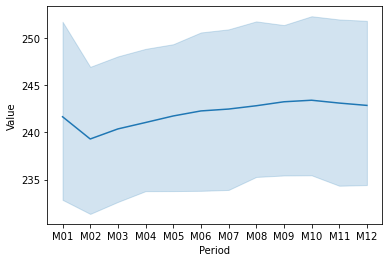

In [12]:
# Over a ten-year period
import seaborn as sns

sns.lineplot(cpi['Period'], cpi['Value']);

In [13]:
df = pd.read_csv('/Users/jasonrobinson/Downloads/file-6.csv')
df.head()

,Series ID,Year,Period,Label,Value
0,CUSR0000SA0,2012,M01,2012 Jan,227.842
1,CUSR0000SA0,2012,M02,2012 Feb,228.329
2,CUSR0000SA0,2012,M03,2012 Mar,228.807
3,CUSR0000SA0,2012,M04,2012 Apr,229.187
4,CUSR0000SA0,2012,M05,2012 May,228.713


In [20]:
cpi.shape, df.shape

((145, 5), (121, 5))

In [21]:
cpi.describe()

,Year,Value
count,145.000000,145.000000
mean,2015.544828,242.019290
std,3.494001,15.109996
min,2010.000000,216.687000
25%,2013.000000,231.407000
50%,2016.000000,238.343000
75%,2019.000000,252.776000
max,2022.000000,281.148000


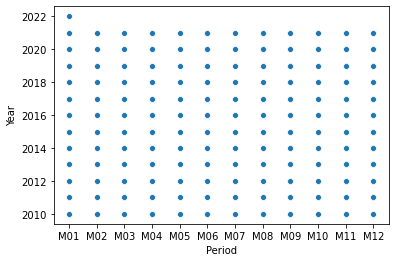

In [31]:
sns.scatterplot(cpi['Period'], cpi['Year']);

In [ ]:
# Create a function to iterate through the months and years
# for each observation

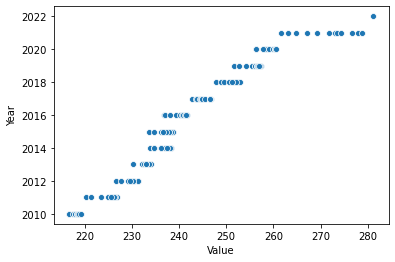

In [32]:
sns.scatterplot(cpi['Value'], cpi['Year']);

In [ ]:
# Check out the variance of the distribution